100%|████████████████████████████████████████| 100/100 [00:00<00:00, 840.82it/s]


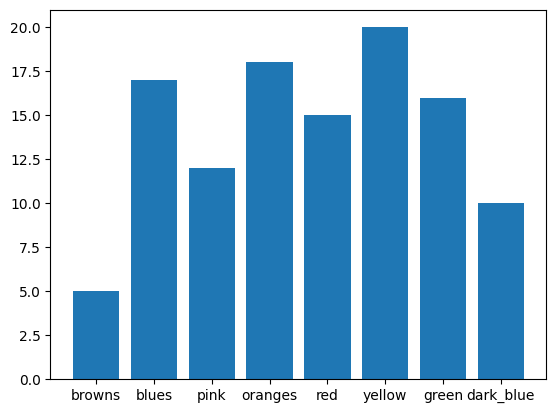

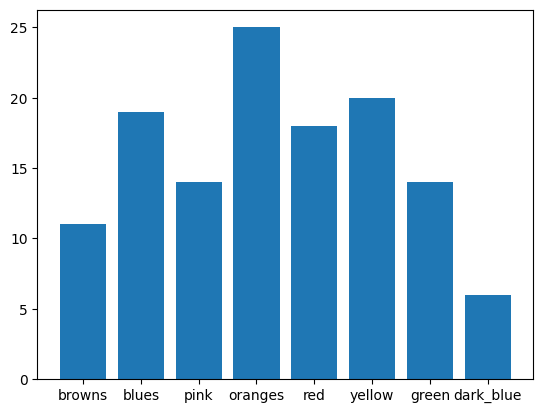

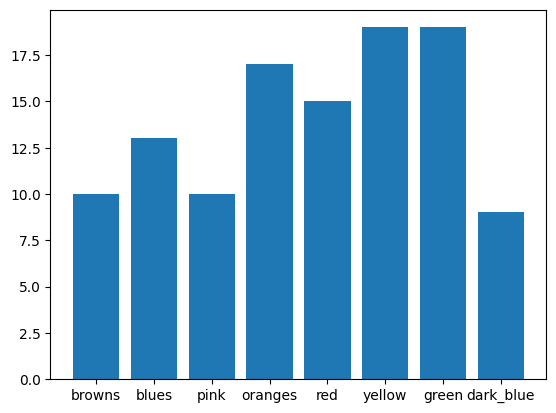

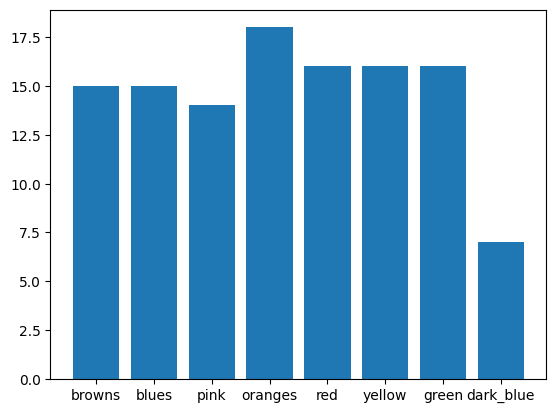

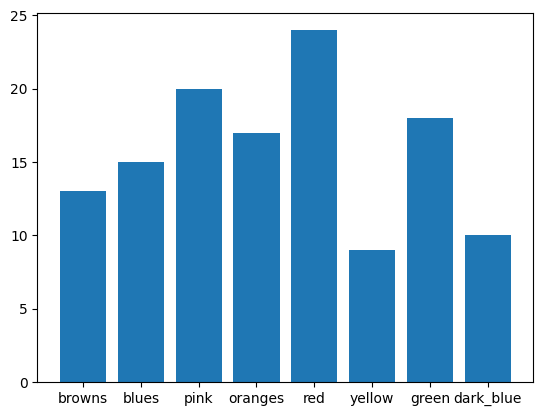

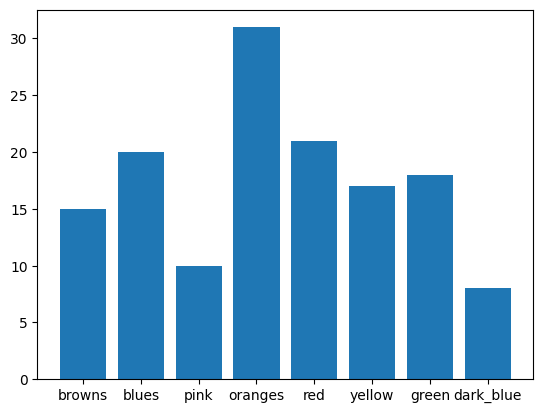

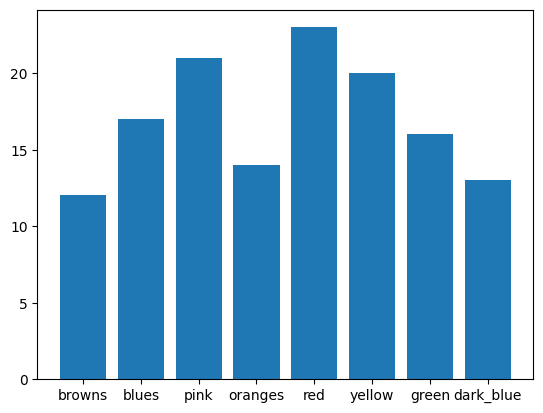

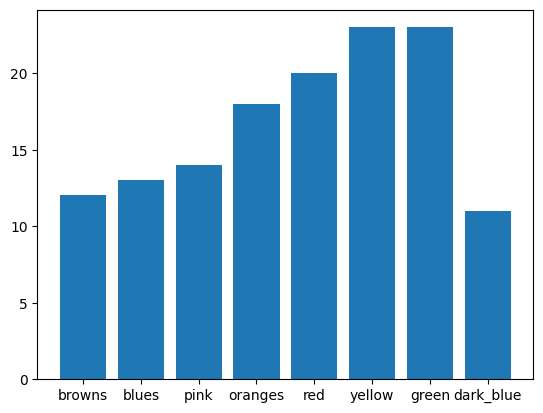

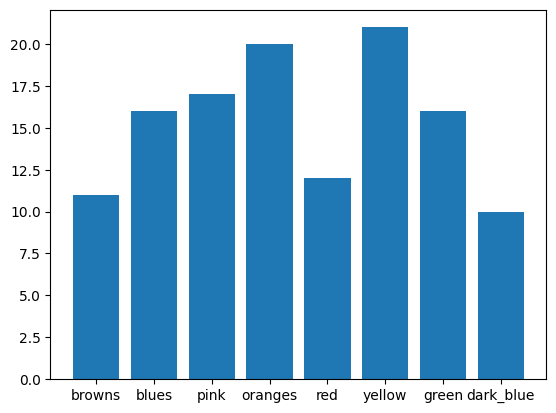

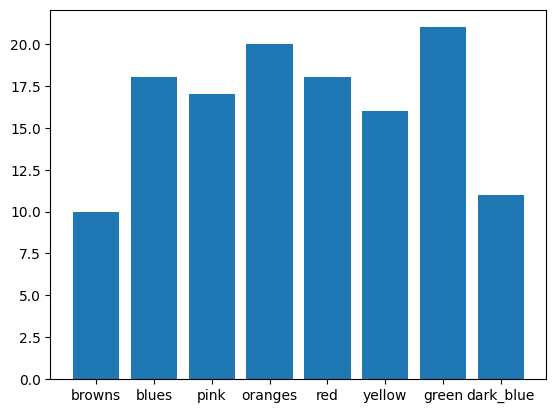

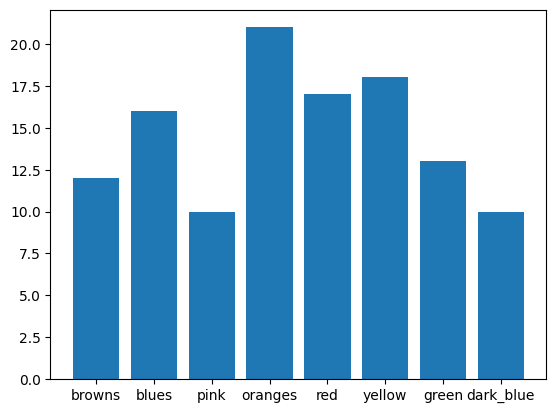

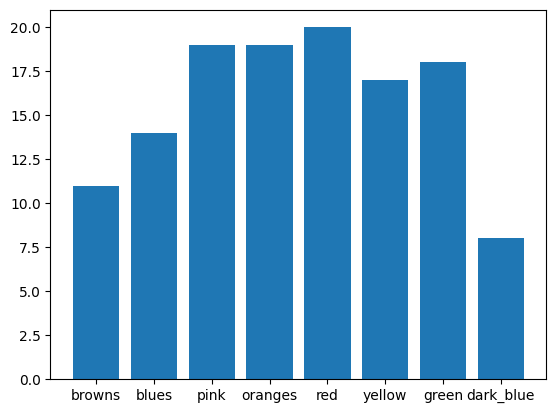

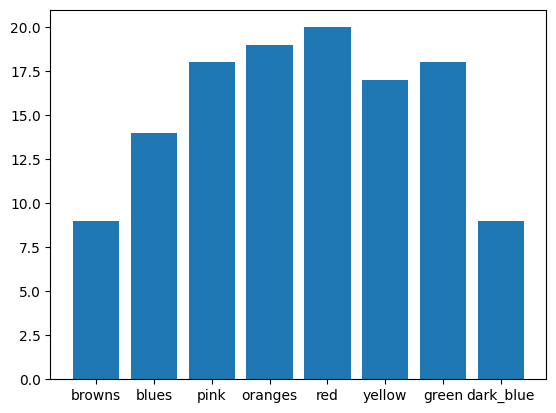

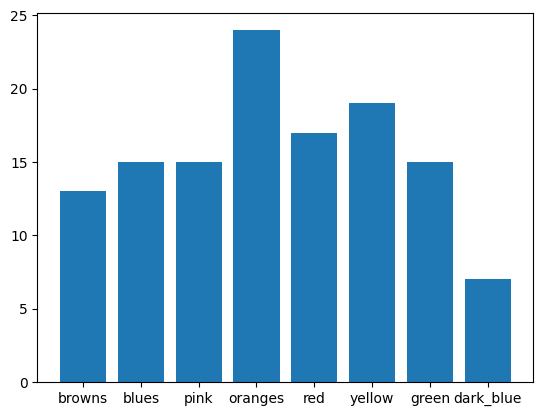

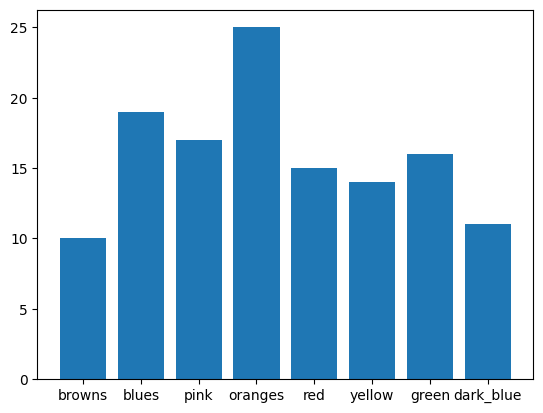

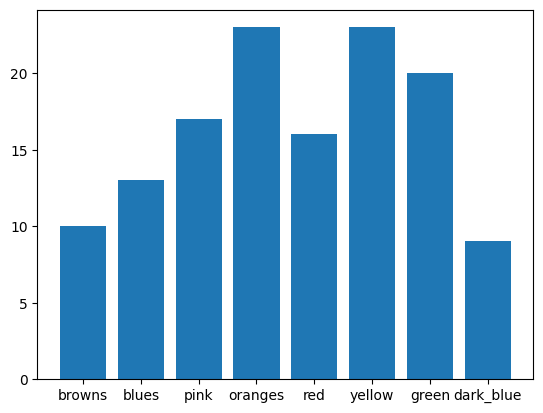

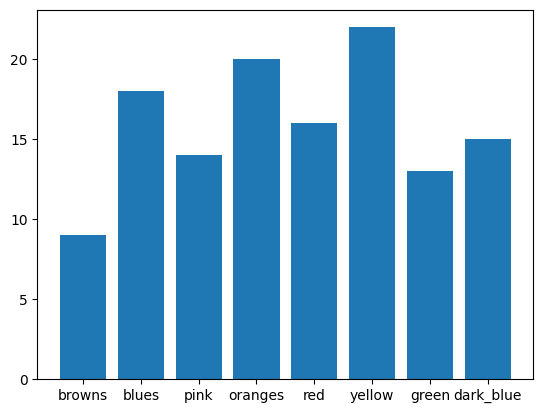

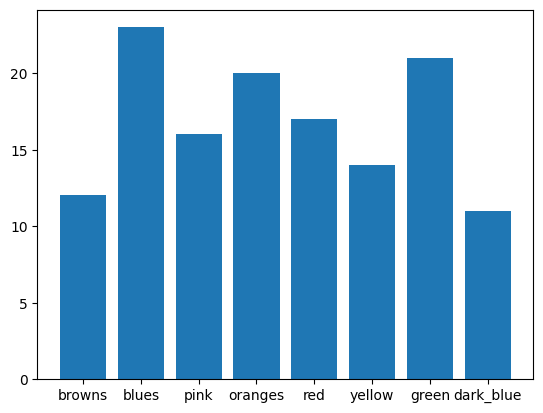

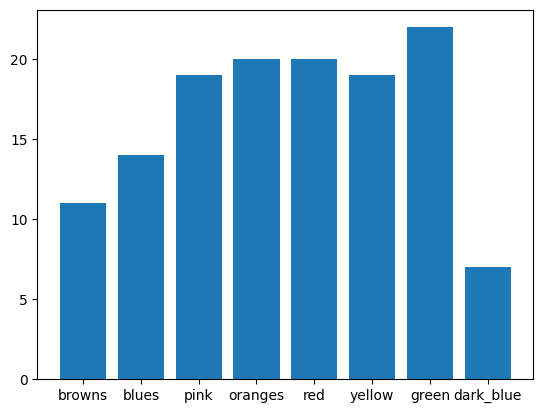

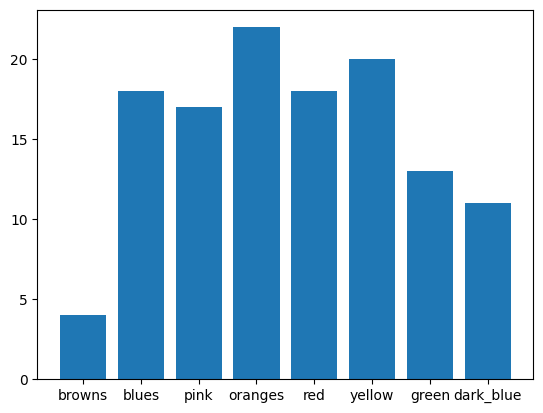

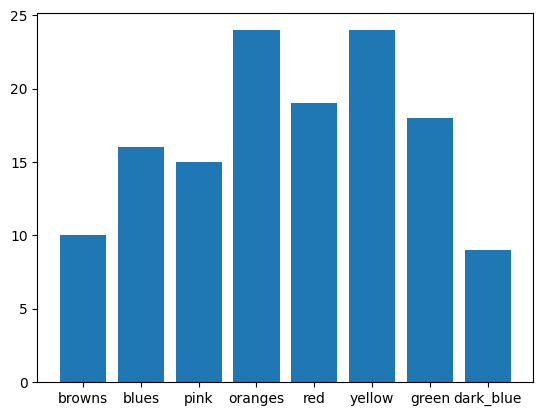

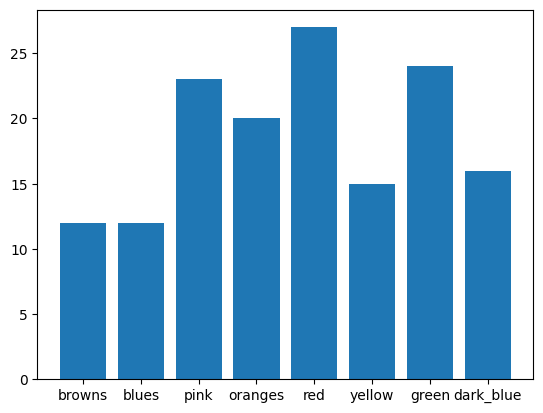

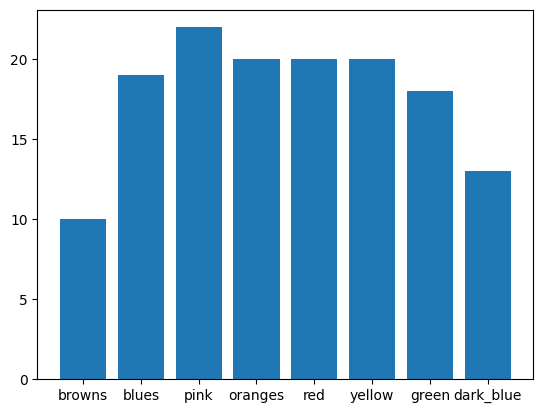

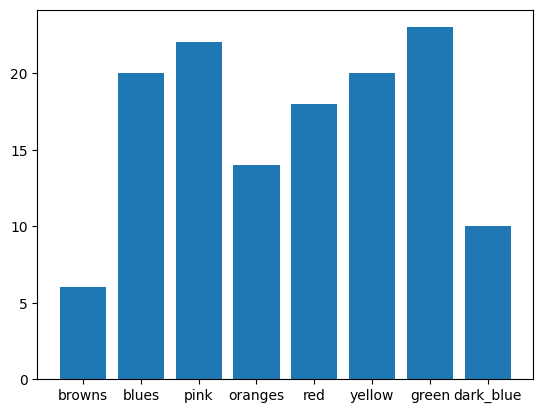

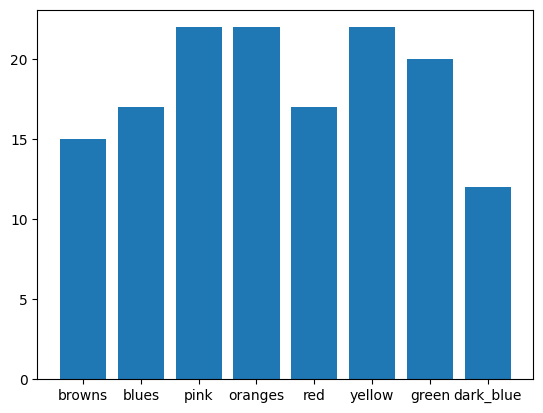

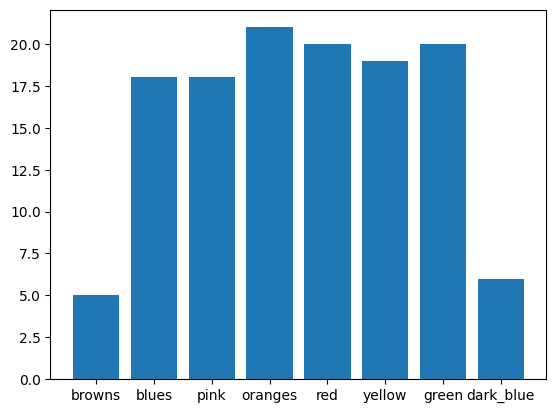

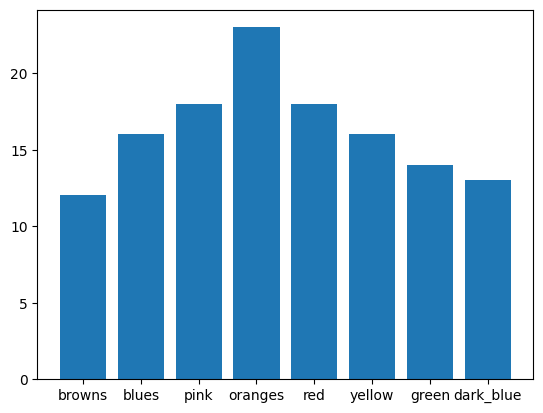

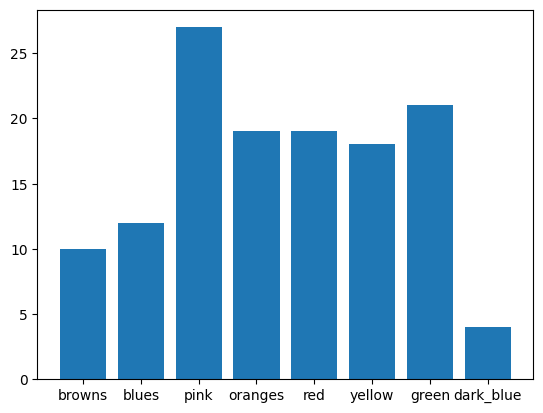

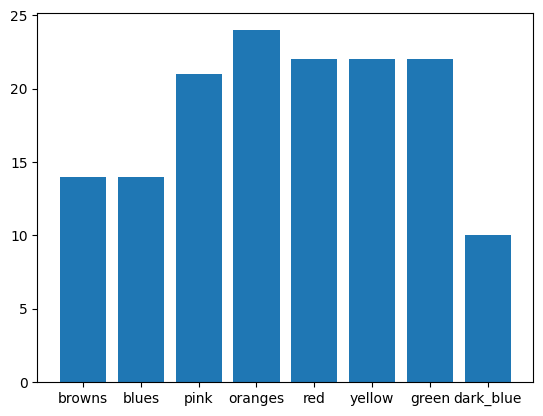

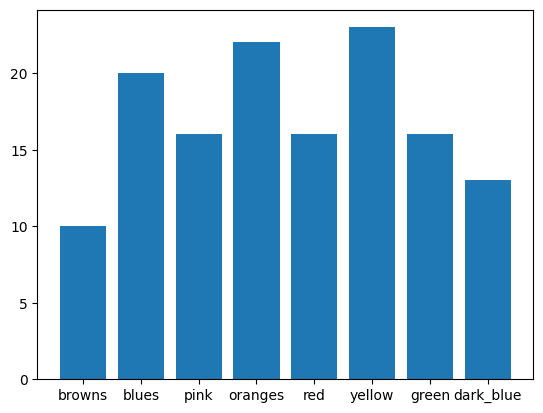

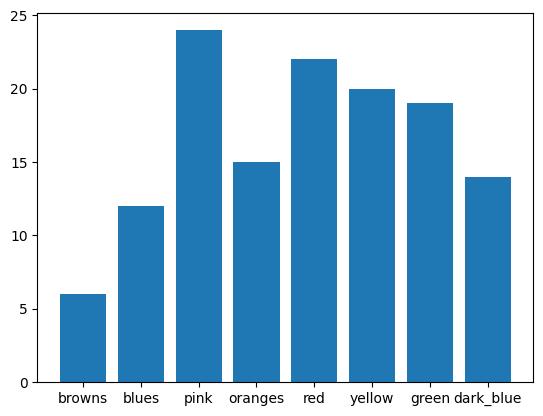

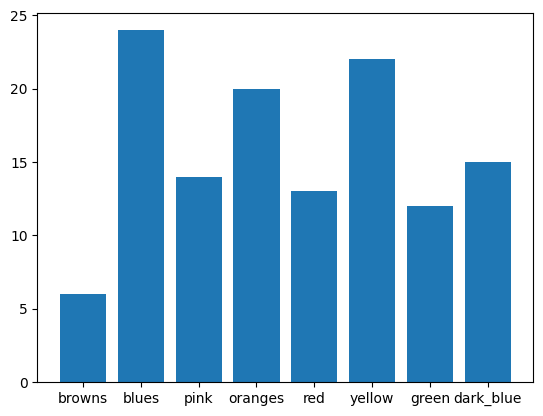

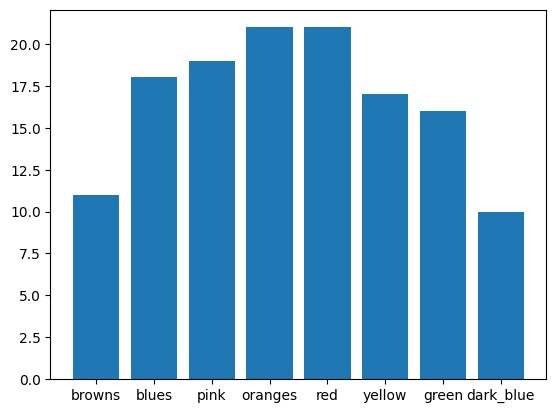

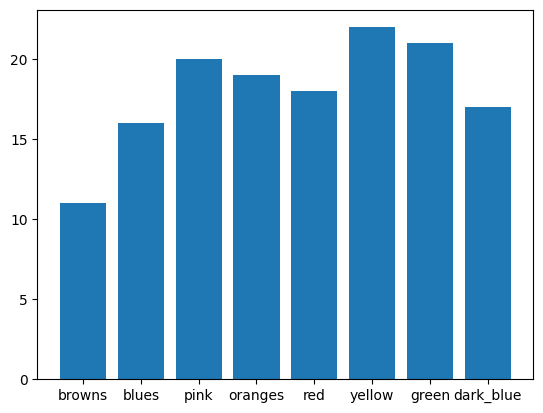

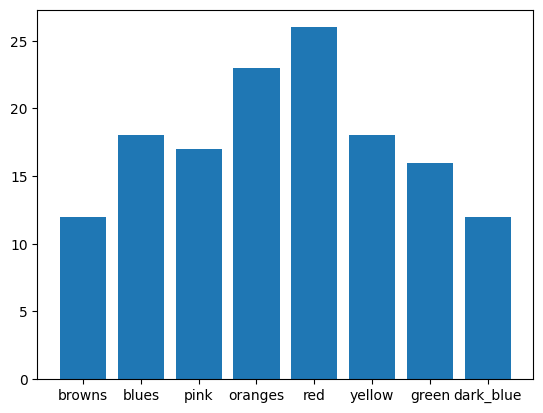

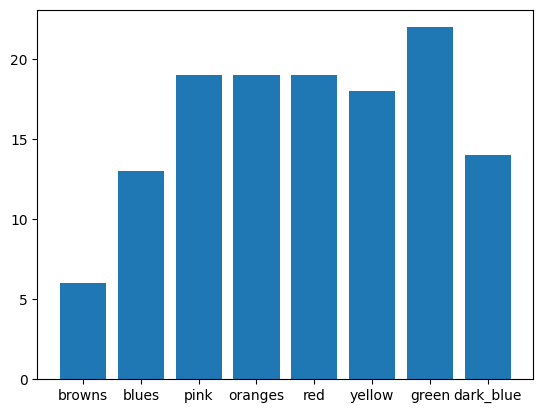

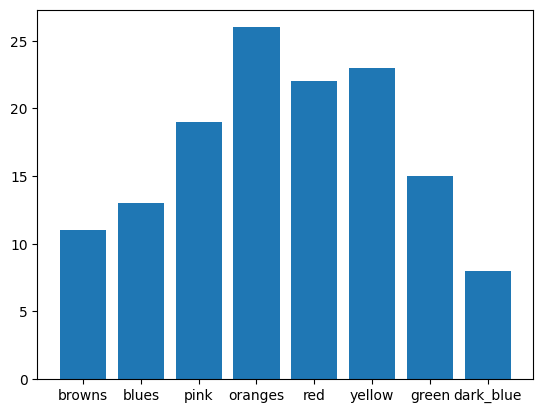

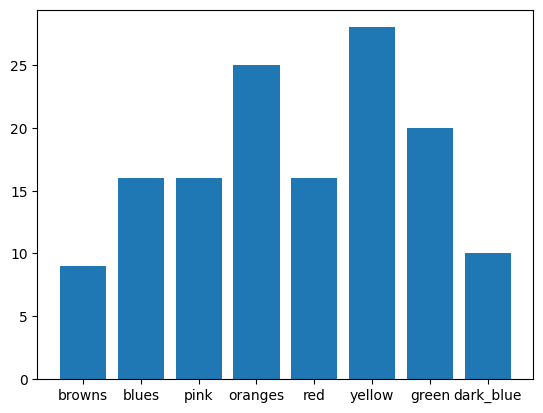

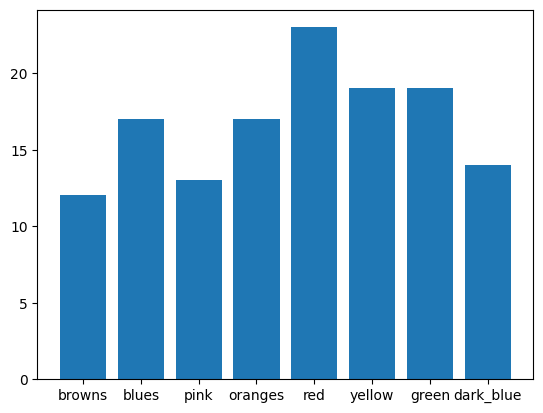

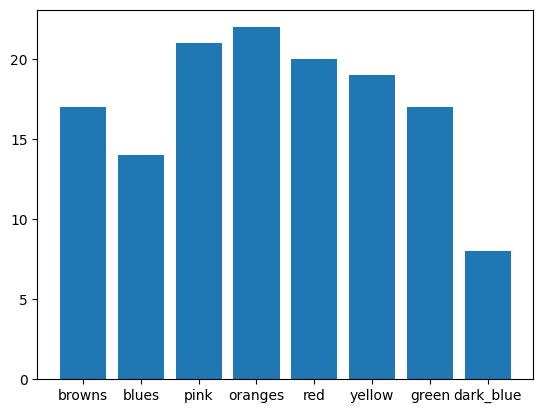

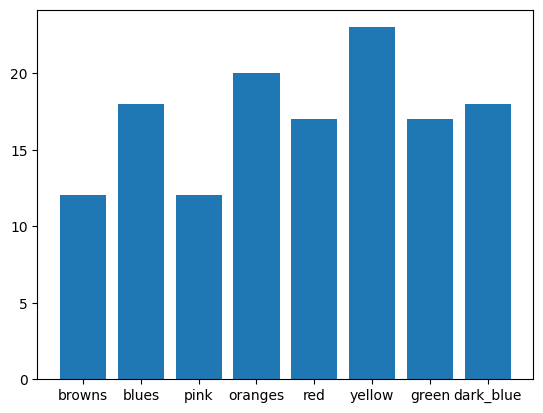

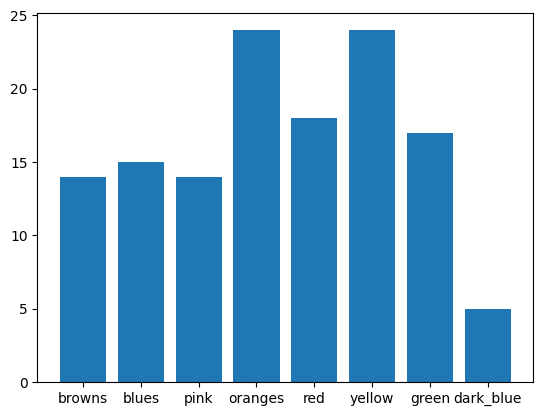

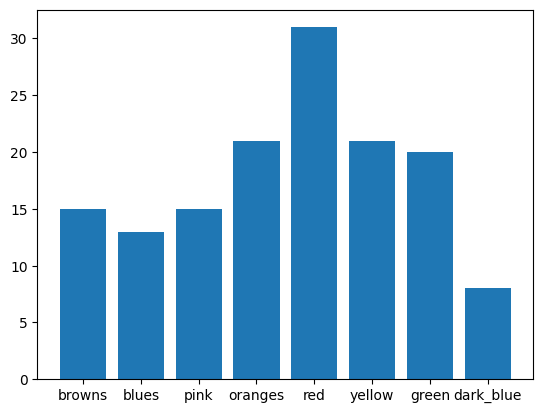

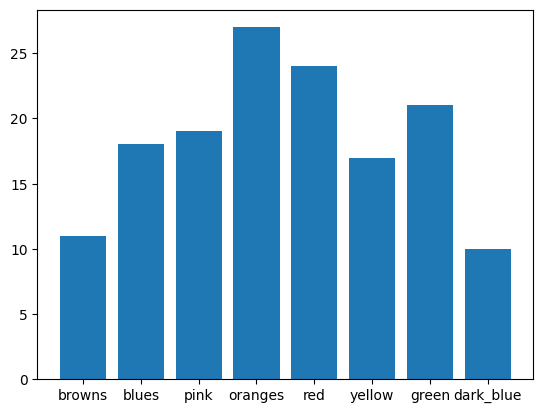

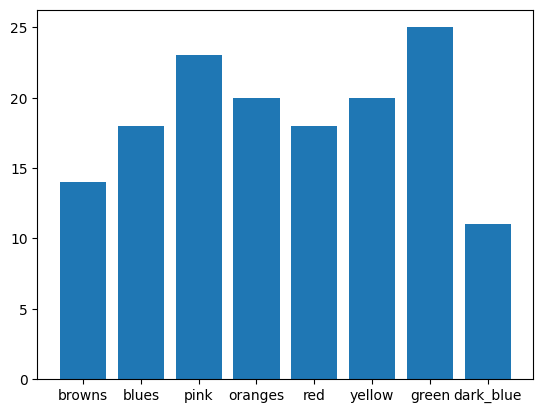

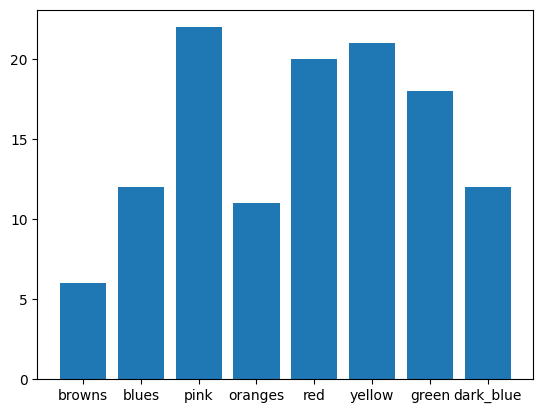

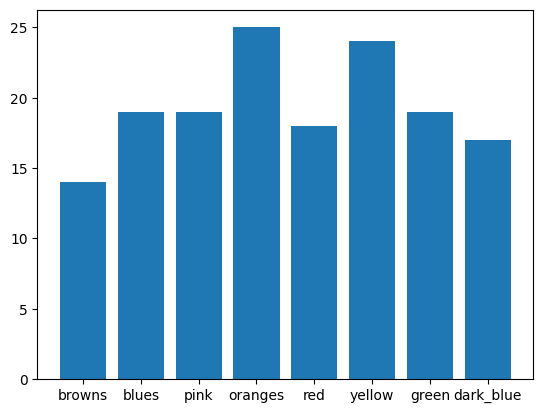

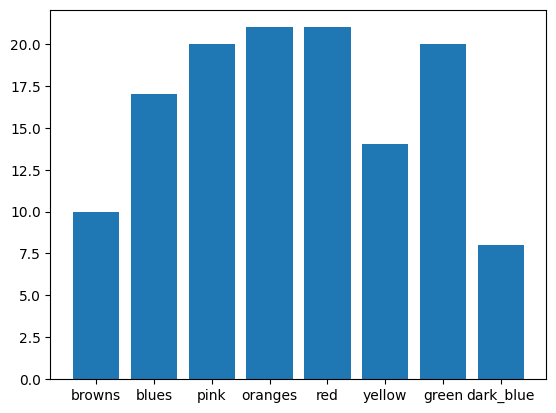

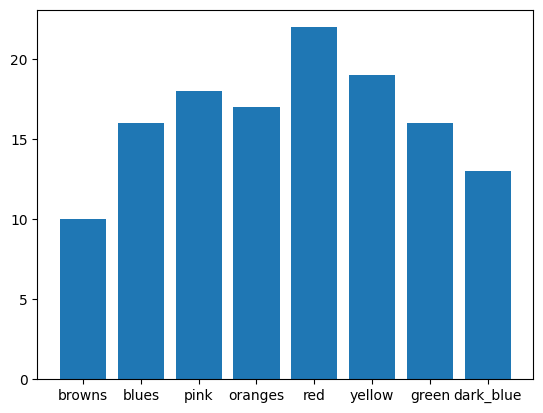

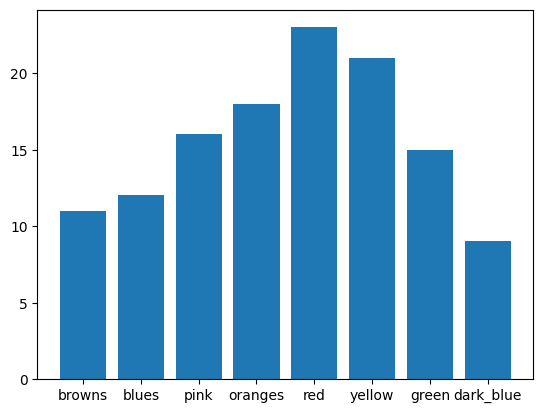

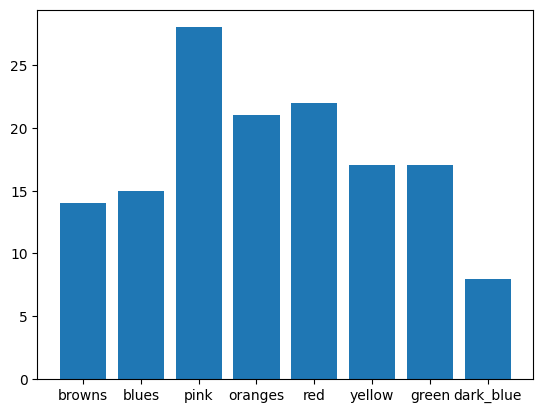

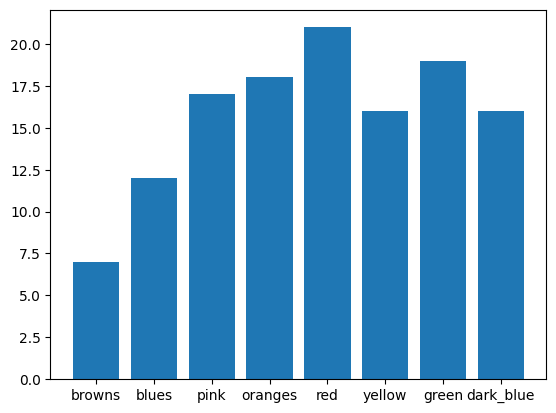

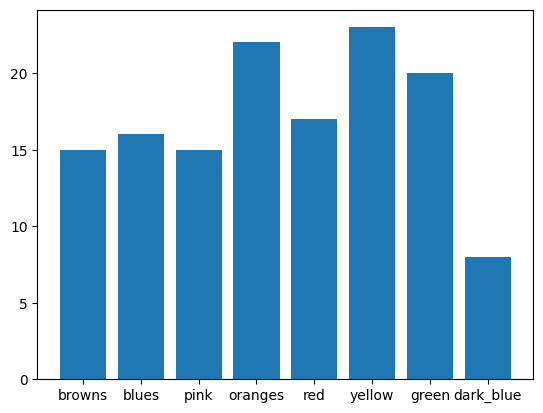

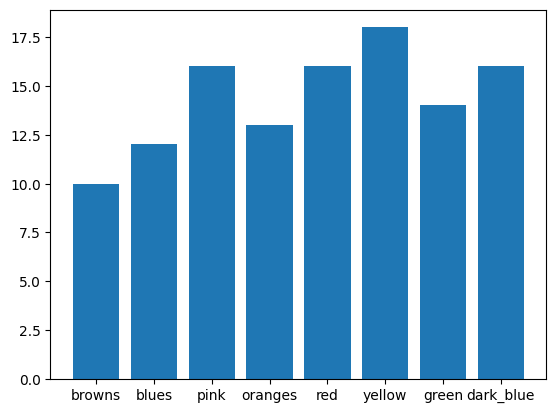

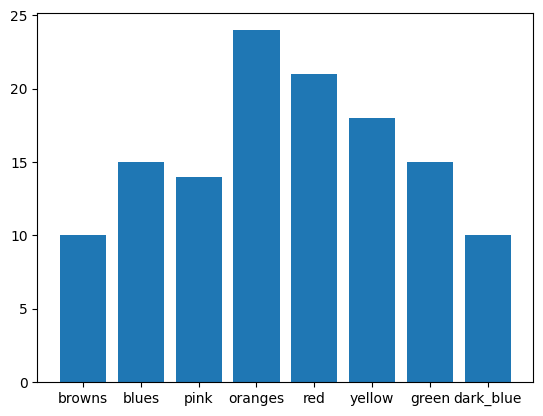

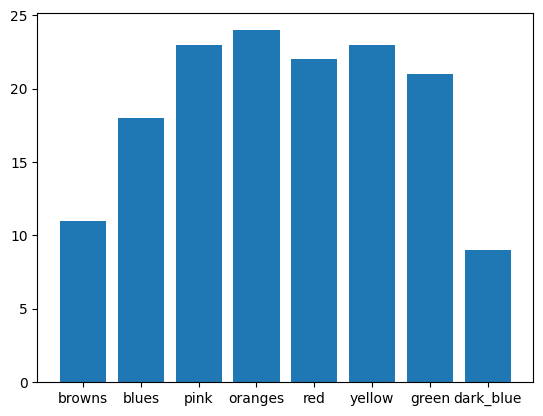

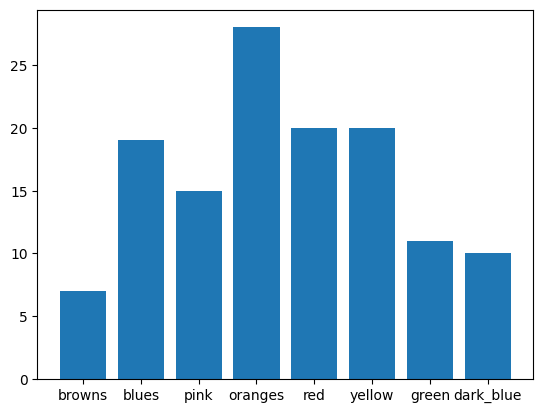

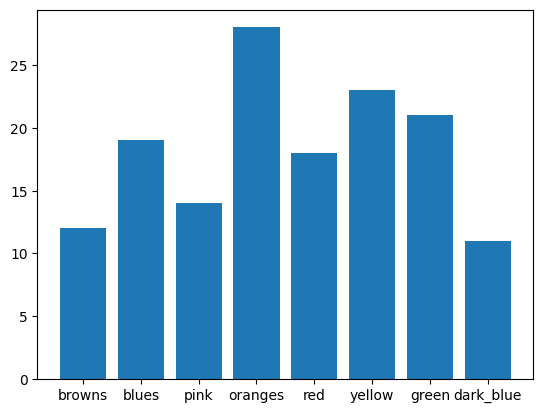

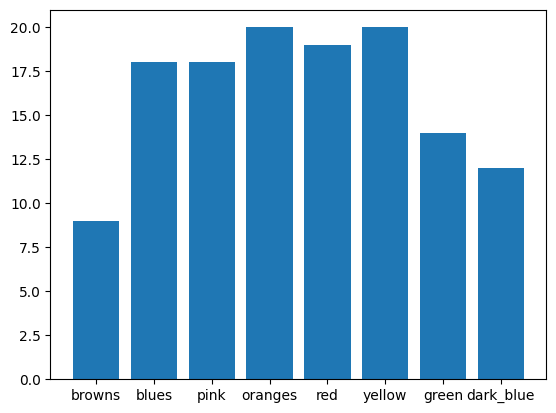

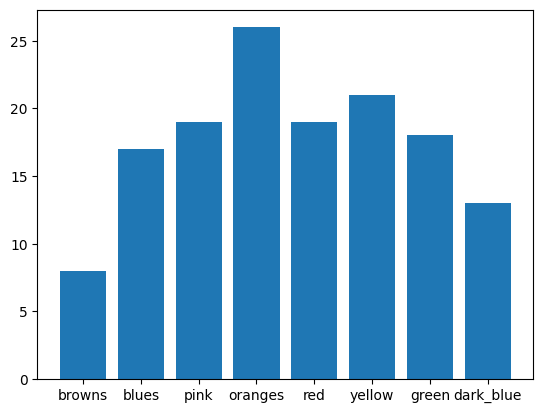

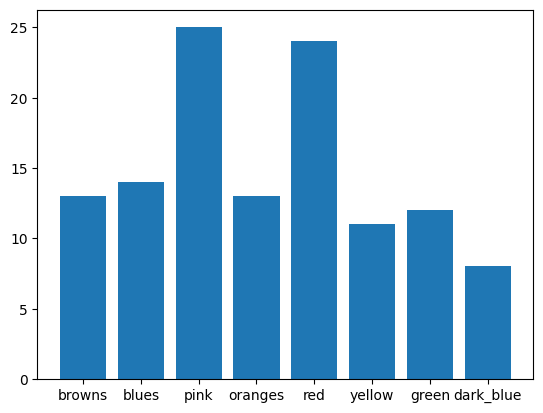

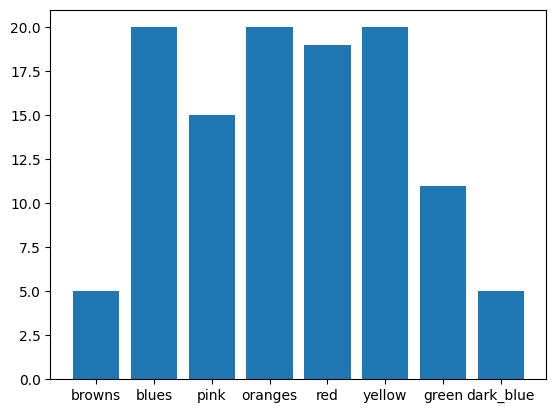

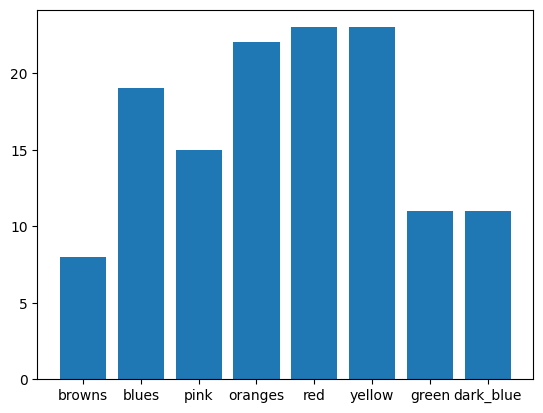

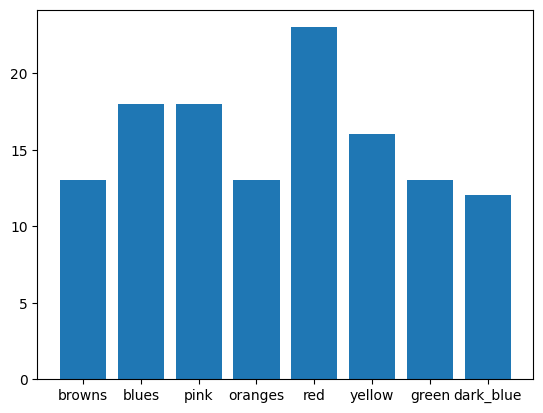

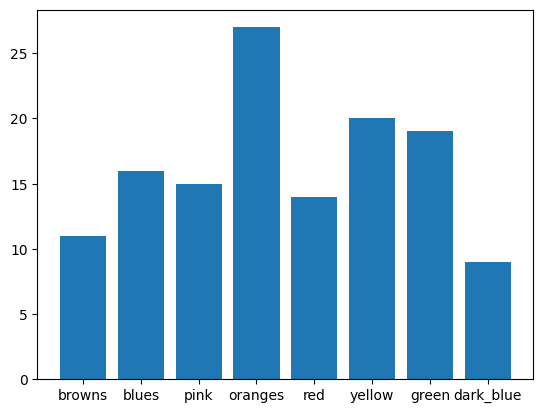

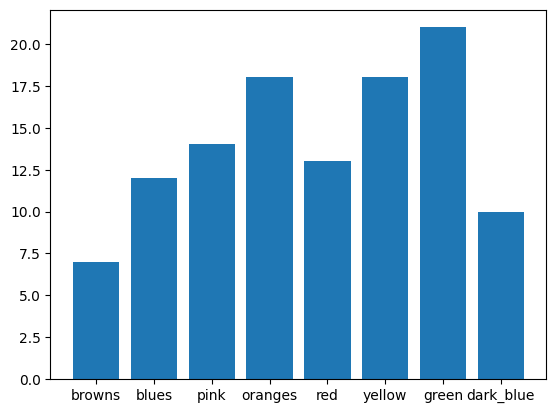

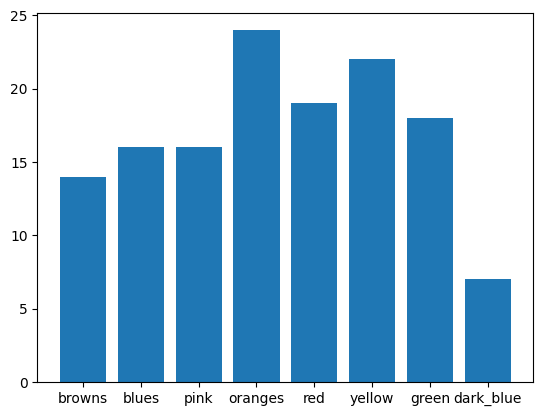

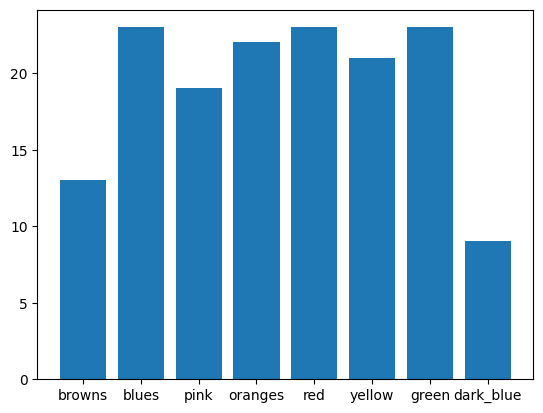

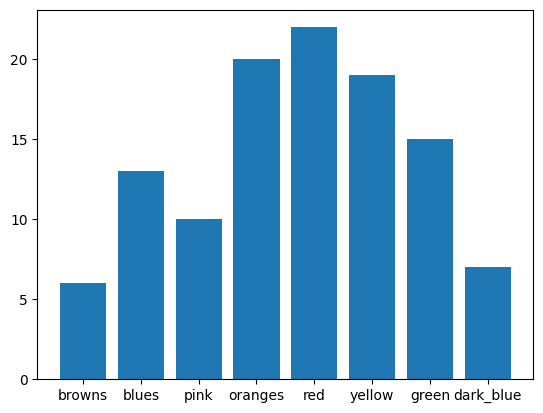

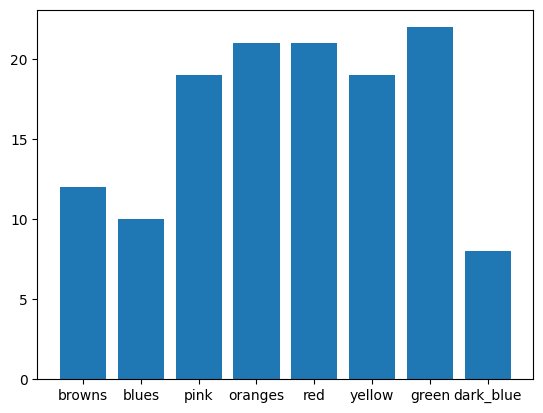

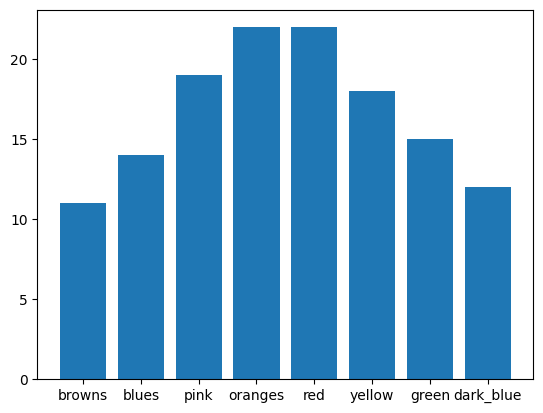

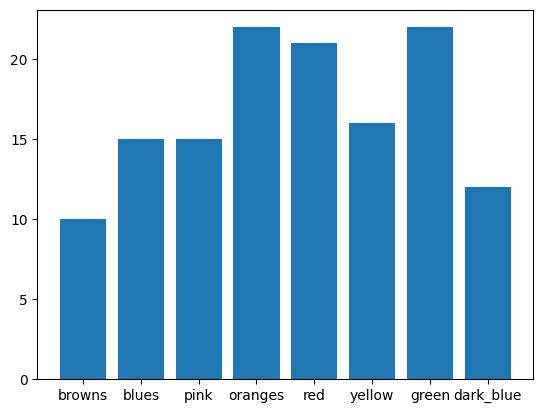

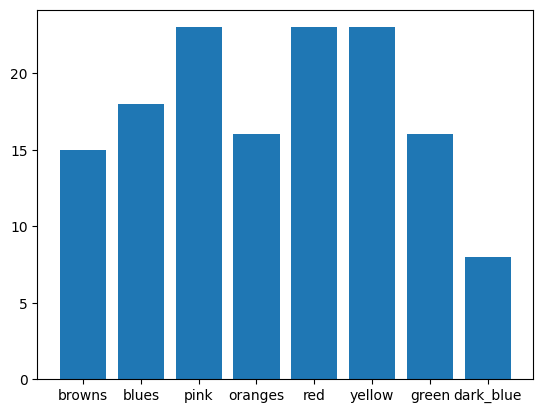

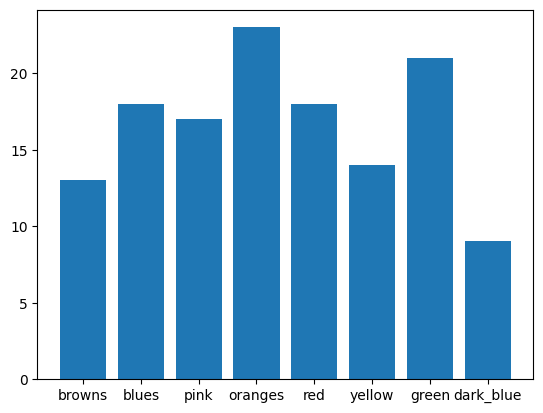

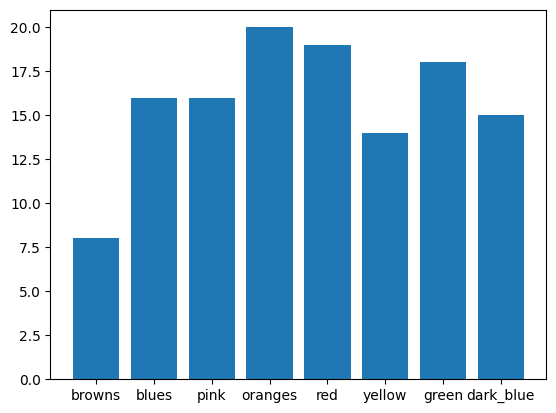

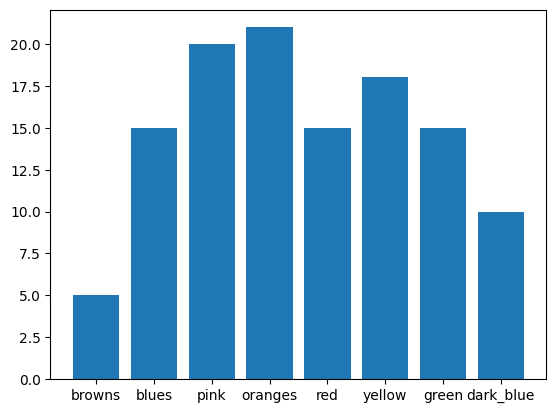

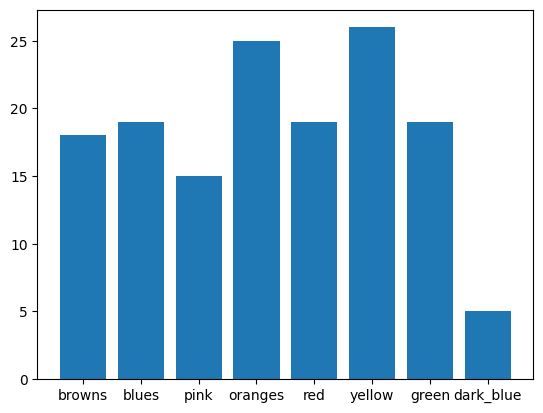

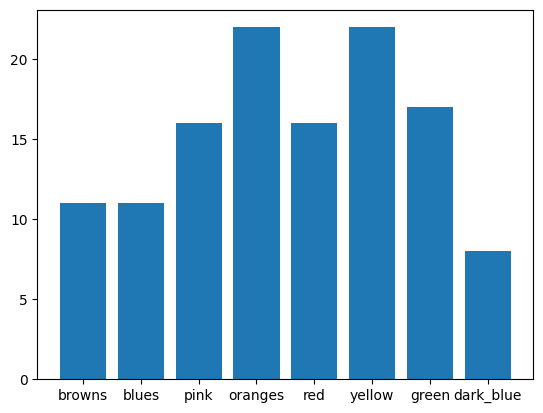

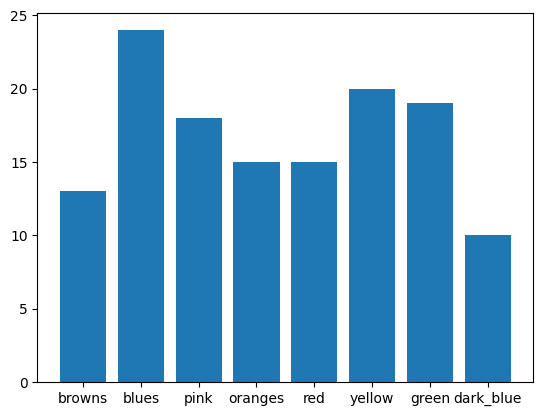

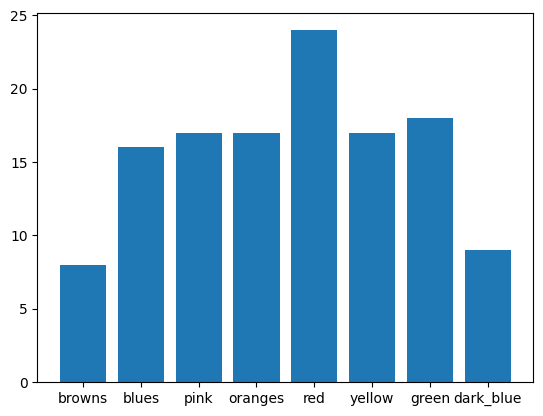

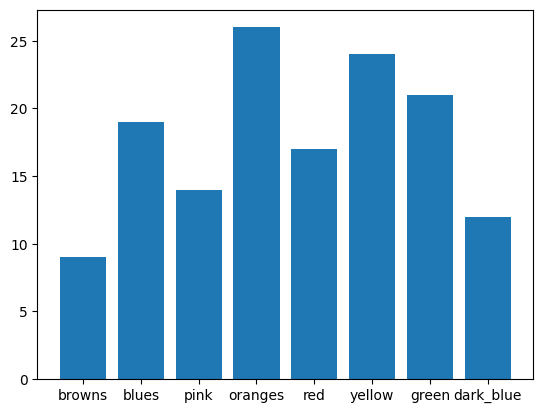

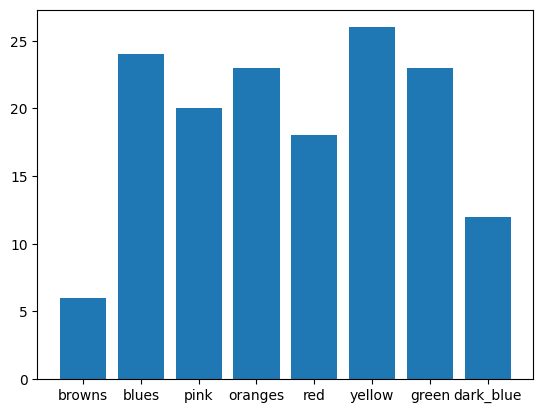

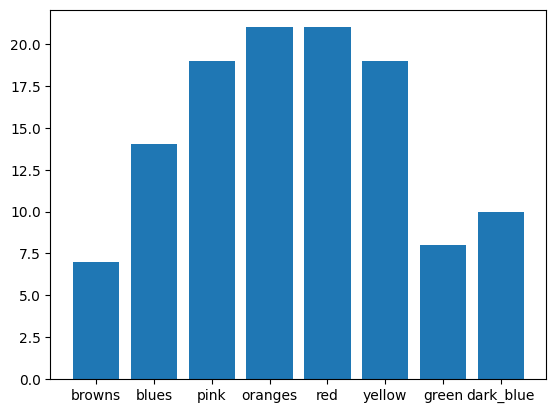

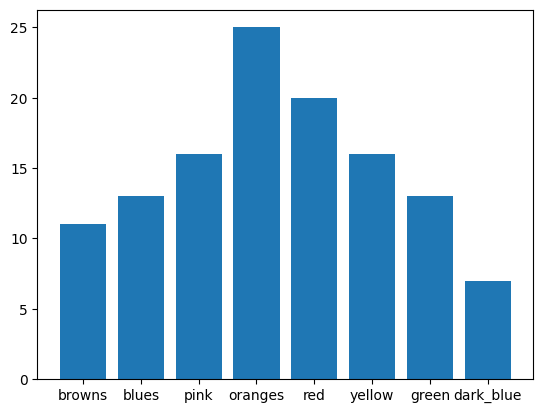

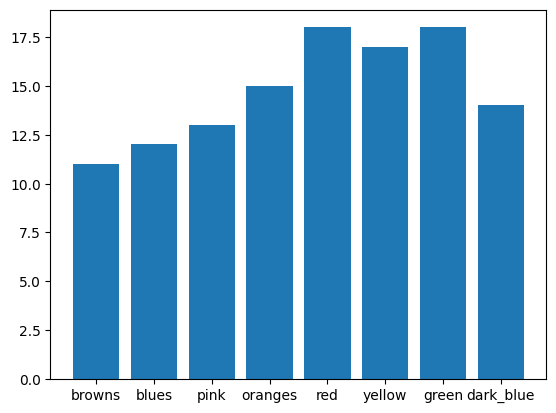

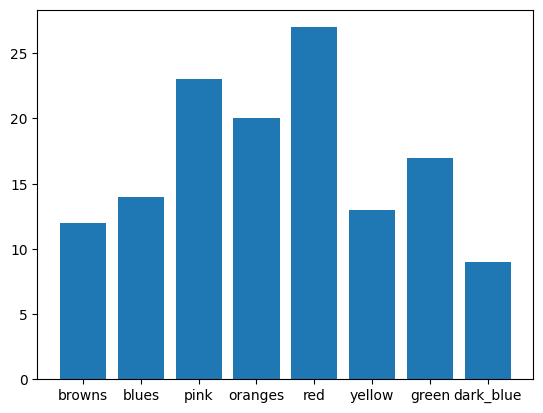

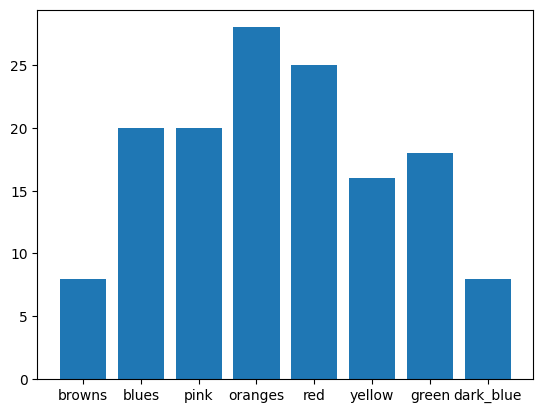

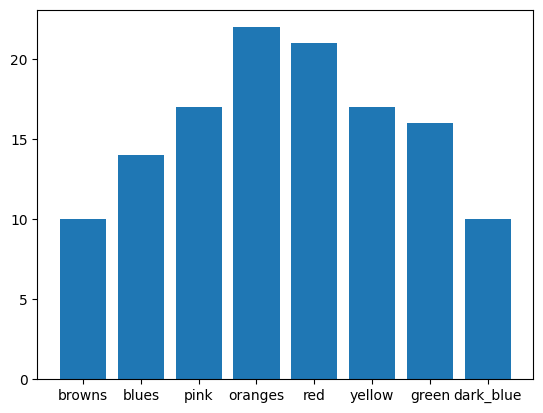

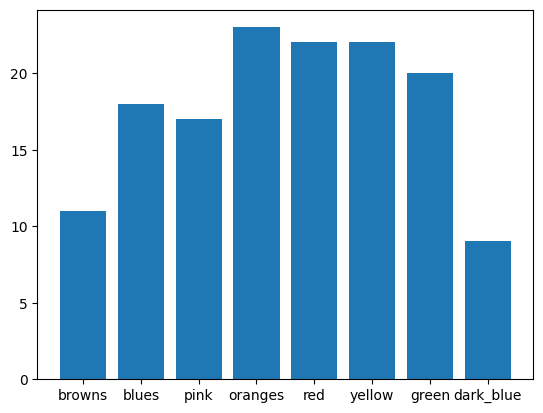

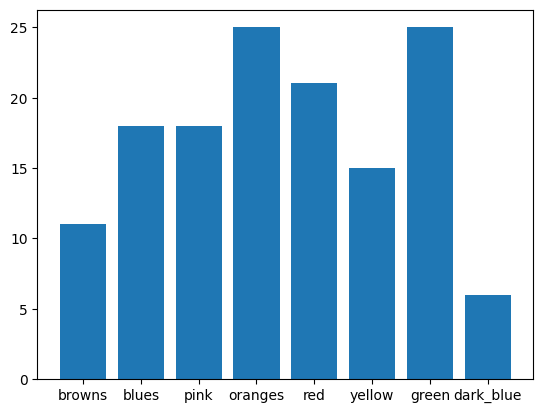

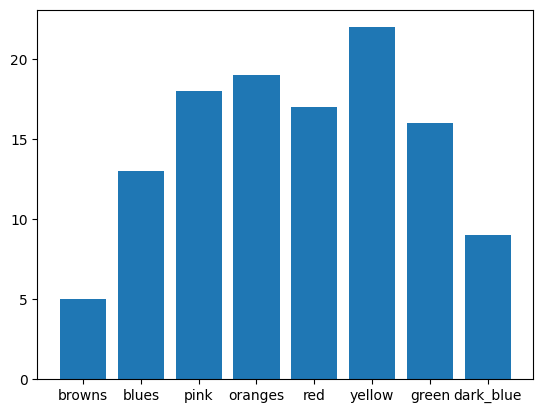

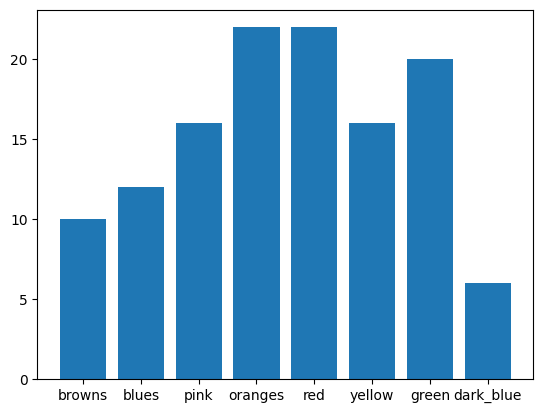

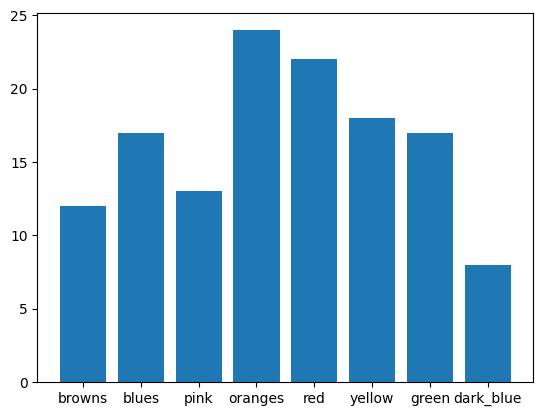

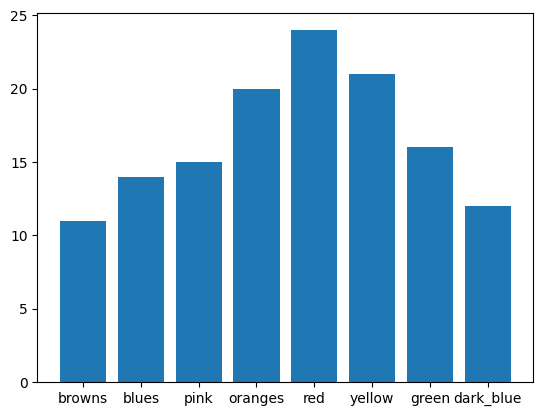

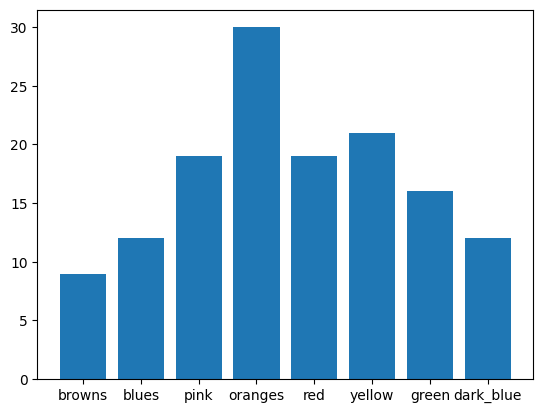

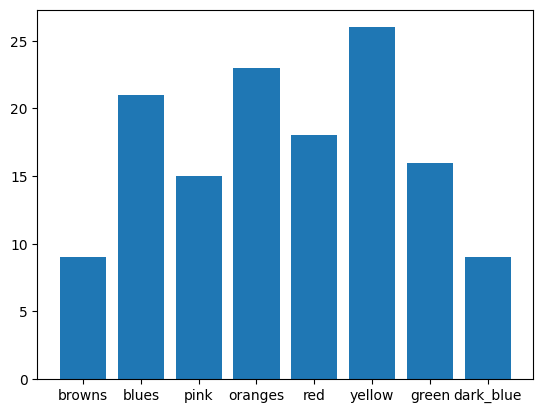

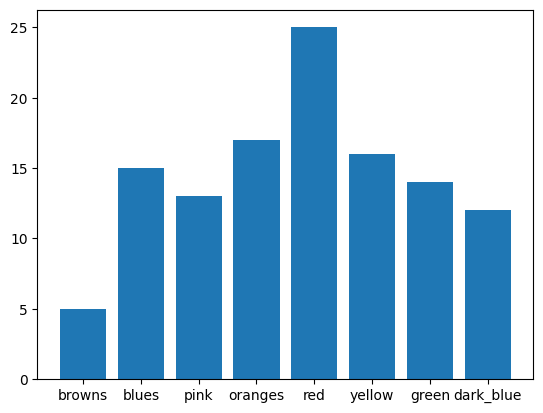

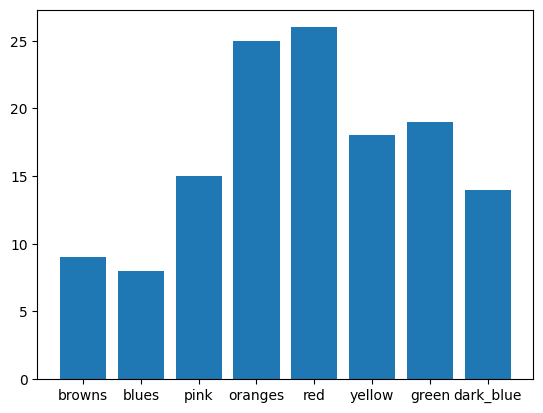

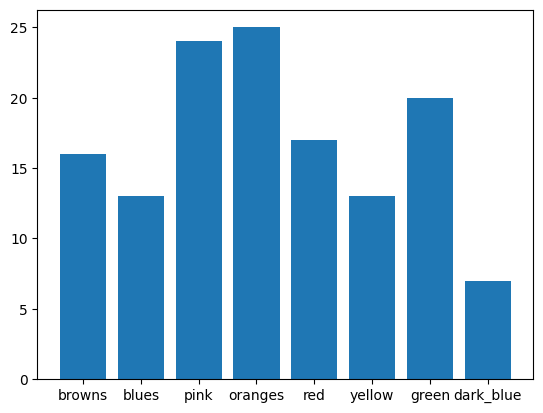

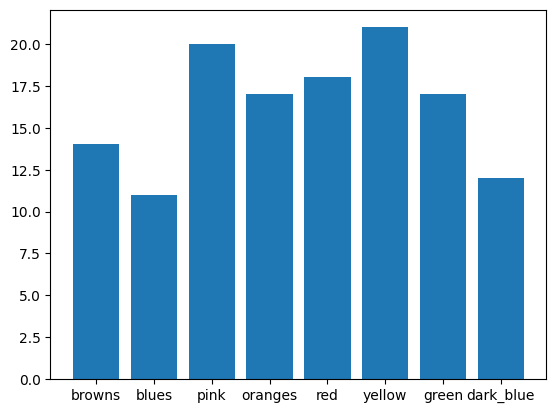

,browns,blues,pink,oranges,red,yellow,green,dark_blue
1,0,5,8,44,20,16,7,0
2,0,3,14,23,23,25,12,0
3,0,16,17,14,18,18,17,0
4,1,21,14,9,18,14,20,3
5,5,20,21,5,12,13,21,3
6,11,21,17,4,9,10,19,9
7,42,11,8,1,0,3,4,31
8,41,3,1,0,0,1,0,54


In [1]:
import random
from tqdm import trange

# array to represent board
board = []
debug_mode = False

for i in range(0, 40):
    board.append(i)

# simulates die
def die():
    return random.randint(1, 6)

# calculates difference in position based on roll
def calculate_position(start, jump):
    if debug_mode:
        print('start: ', start)
        print('jump: ', jump)
        
    return (start + jump) % len(board)

# simulates the odds of landing in jail based
# on drawing a card & it being true
def in_jail(pos):
    res = random.uniform(0, 1)
    
    if pos in [2, 7, 17, 22, 33, 36] and res <= 0.125:
        return True
    
    return False
    
# marking number of lands on board
def complete_turn_v1(start, counter):
    d_1 = die()
    d_2 = die()
    
    if debug_mode:
        print('d_1', d_1)
        print('d_2', d_2)
    
    new_pos = calculate_position(start, d_1 + d_2)
    
    if in_jail(new_pos):
        new_pos = 30
    
    # counting jail
    if new_pos == 30:
        new_pos = 10
        counter[new_pos] += 1
        return new_pos
    
    counter[new_pos] += 1
    
    # if you roll the same number, you keep rolling
    if d_1 == d_2:
        return complete_turn_v1(new_pos, counter)
    else:
        return new_pos
    
# simple object to maintain player state 
class Player:
    def __init__(self):
        self.position = 0
        self.positions = [0]

all_counters = []

# simulate 100 games with 4 players and each player draws 50 times
NUM_GAMES = 100
for j in trange(0, NUM_GAMES):
    
    players = [Player(), Player(), Player(), Player()]
    NUM_DRAWS_PER_PLAYER = 50
    
    c = {}
    for i in range(0, 40):
        c[i] = 0
    
    for i in range(0, NUM_DRAWS_PER_PLAYER):
        for player in players:
            new_pos = complete_turn_v1(player.position, c)
            player.position = new_pos
            player.positions.append(new_pos)
            
    all_counters.append(c)
    
import numpy as np
import matplotlib.pyplot as plt

# visualize the results of all games
for counter in all_counters:

    counter_vals = list(counter.values())
    landings = list(counter.keys())

    if debug_mode:
        plt.bar(range(len(counter_vals)), counter_vals)
        plt.show()
        
# sum the appearances on each position for all the games
for counter in all_counters:
    by_prop = {
        'browns': counter[1] + counter[3],
        'blues': counter[6] + counter[8] + counter[9],
        'pink': counter[11] + counter[13] + counter[14],
        'oranges': counter[16] + counter[18] + counter[19],
        'red': counter[21] + counter[23] + counter[24],
        'yellow': counter[26] + counter[27] + counter[29],
        'green': counter[31] + counter[32] + counter[34],
        'dark_blue': counter[37] + counter[39]
    }
    props = list(by_prop.keys())
    values = list(by_prop.values())
    
    plt.bar(range(len(props)), values, tick_label=props)
    plt.show()
    
rankings = {}

mapping = {
    'browns': 0,
    'blues': 1,
    'pink': 2,
    'oranges': 3,
    'red': 4,
    'yellow': 5,
    'green': 6,
    'dark_blue': 7
}

output = []
for i in range(0, 8):
    row = [0] * 8
    output.append(row)

for i in range(0, len(all_counters)):
    counter = all_counters[i]
    by_prop = {
        'browns': counter[1] + counter[3],
        'blues': counter[6] + counter[8] + counter[9],
        'pink': counter[11] + counter[13] + counter[14],
        'oranges': counter[16] + counter[18] + counter[19],
        'red': counter[21] + counter[23] + counter[24],
        'yellow': counter[26] + counter[27] + counter[29],
        'green': counter[31] + counter[32] + counter[34],
        'dark_blue': counter[37] + counter[39]
    }
    
    sorted_prop = sorted(by_prop, key = by_prop.get, reverse = True)
    
    for j in range(0, len(sorted_prop)):
        row_position = j
        color = sorted_prop[j]
        col_position = mapping[color]
        output[row_position][col_position] += 1
    
import pandas as pd

new_index = {}
for i in range(0, 8):
    new_index[i] = i + 1
    
new_index

df = pd.DataFrame(output, columns=list(mapping.keys()))
df.rename(index=new_index)

In [2]:
df.head(10)

,browns,blues,pink,oranges,red,yellow,green,dark_blue
0,0,5,8,44,20,16,7,0
1,0,3,14,23,23,25,12,0
2,0,16,17,14,18,18,17,0
3,1,21,14,9,18,14,20,3
4,5,20,21,5,12,13,21,3
5,11,21,17,4,9,10,19,9
6,42,11,8,1,0,3,4,31
7,41,3,1,0,0,1,0,54
